# Porojeto de Controlador PI

Sistema Identificado

$$\frac{0.008736}{0.0009883 s^2 + 0.006687 s + 0.01556}$$

In [1]:
import numpy as np
import control as ct
from matplotlib import pyplot as plt


In [2]:
num_c = np.array([0.008736/0.008736])
den_c = np.array([0.0009883437/0.008736, 0.00668674000000001/0.008736, 0.015563/0.008736])
Gs = ct.tf(num_c, den_c)
Gs

TransferFunction(array([1.]), array([0.11313458, 0.76542353, 1.78147894]))

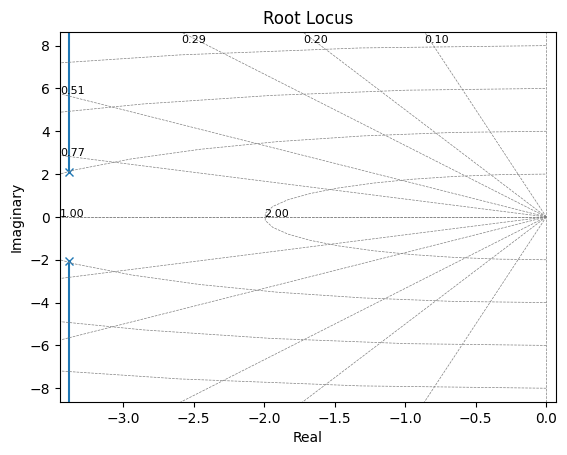

In [33]:
ct.rlocus(Gs);

In [3]:
ct.step_info(Gs)

{'RiseTime': 0.6806741313030195,
 'SettlingTime': 1.0725774190229396,
 'SettlingMin': 0.5105507451854797,
 'SettlingMax': 0.5646735691286616,
 'Overshoot': 0.5954070094936054,
 'Undershoot': 0,
 'Peak': 0.5646735691286616,
 'PeakTime': 1.5057336843975884,
 'SteadyStateValue': 0.56133136284778}

In [4]:
ct.poles(Gs)

array([-3.38280094+2.07441661j, -3.38280094-2.07441661j])

(array([-3.38280094+2.07441661j, -3.38280094-2.07441661j]),
 array([], dtype=complex128))

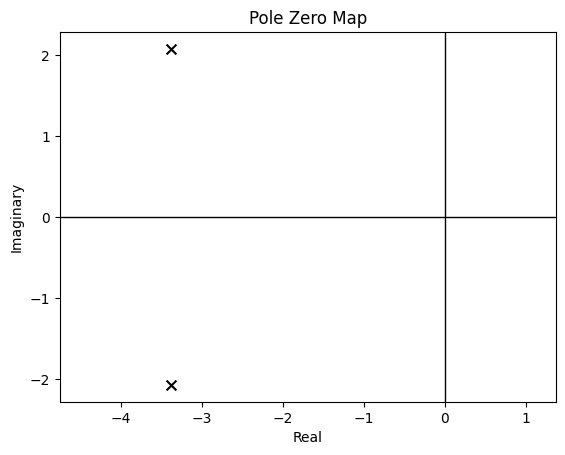

In [5]:
ct.pzmap(Gs)

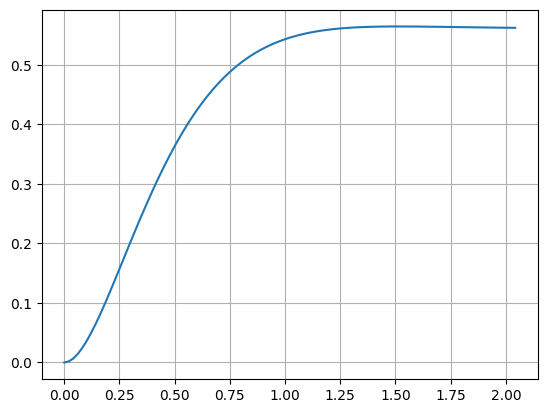

In [6]:
t, y = ct.step_response(Gs)

plt.plot(t, y)
plt.grid()
plt.show()

### Caracteristicas do sistema

>> Overshoot    : 0.5954\
>> SettlingTime : 1.0725

In [7]:
from IPython.display import display, Math
from matplotlib import pyplot as plt

import sympy as sp

In [8]:
Mp = 0.1
ts = 0.5

xi = -np.log(Mp)/np.sqrt(np.pi**2+np.log(Mp)**2)
wn = 4/(ts*xi)
p = -xi*wn+1j*wn*np.sqrt(1-xi**2)
poli = np.poly([p,np.conj(p)])

strpoli = f's^2+{poli[1]:.2f}s+{np.round(poli[2], 3)}'
print('Amortecimento e frequência natural projetados Sistema desejado:')
display(Math(r'\xi = '+f'{np.round(xi,4)}'+r',\quad\omega_n = '+f'{np.round(wn,4)}'))

print("Pólo de MF principal Sistema desejado: ")
display(Math(f'{np.round(p, 3)}'))

print("Polinômio de MF desejado:")
display(Math(strpoli))

Amortecimento e frequência natural projetados Sistema desejado:


<IPython.core.display.Math object>

Pólo de MF principal Sistema desejado: 


<IPython.core.display.Math object>

Polinômio de MF desejado:


<IPython.core.display.Math object>

## Estrutura do controlador

In [9]:
Gs

TransferFunction(array([1.]), array([0.11313458, 0.76542353, 1.78147894]))

In [10]:
Cs_s = r"C(s) = \frac{" + f"{0.1131}s^2" + f"+{0.7654}s" + r"+1.781" + r"}{1}" +\
      r'\cdot \frac{K}{s(s+c)}'

print("Controlador proposto: ")
display(Math(Cs_s))

Controlador proposto: 


<IPython.core.display.Math object>

In [11]:
s, K, c = sp.symbols("s K c")

Cs_symbol = ((0.1131*s**2 + 0.7654*s + 1.781)/1)*((K)/(s**2+s*c))

Cs_symbol


K*(0.1131*s**2 + 0.7654*s + 1.781)/(c*s + s**2)

In [12]:
Gs_symbol = (1)/(0.1131*s**2 + 0.7654*s + 1.781)
Gs_symbol

1/(0.1131*s**2 + 0.7654*s + 1.781)

In [13]:
Gs_MF = (Cs_symbol*Gs_symbol).as_poly()/(1-Cs_symbol*Gs_symbol).as_poly()
Gs_MF

K/((-K/(c*s + s**2) + 1)*(c*s + s**2))

In [14]:
Gs_MF.simplify()

K/(-K + c*s + s**2)

Agora podemos igualar os polinômios e obter os valores de K e c.

In [15]:
display(Math(strpoli + r' = s^2+cs-K'))

<IPython.core.display.Math object>

In [16]:
c = poli[1]
K = poli[2]
display(Math(rf'c = {c}\\ K={np.round(K, 4)}'))

<IPython.core.display.Math object>

In [17]:
Gs

TransferFunction(array([1.]), array([0.11313458, 0.76542353, 1.78147894]))

In [18]:
Cs_s = r"C(s) = \frac{" + f"{0.1131}s^2" + f"+{0.7654}s" + r"+1.781" + r"}{1}"+\
     r'\cdot \frac{183.13}{s(s+15.99)}'

print("Controlador proposto: ")
display(Math(Cs_s))

Controlador proposto: 


<IPython.core.display.Math object>

In [19]:
num = ((0.1131*s**2 +0.7654*s +1.781)*(K))
den = (s**2+s*c).as_poly()
Cs_final = num/den
Cs_final

(20.7128468883049*s**2 + 140.173412982392*s + 326.167818815835)/(1.0*s**2 + 16.0*s)

### Validação do controlador projetado

In [20]:
num_cs = np.array([20.7128468883049, 140.17341, 326.1678])
den_cs = np.array([1, 16, 0])

Cs_teste = ct.tf(num_cs, den_cs)
Cs_teste

TransferFunction(array([ 20.71284689, 140.17341   , 326.1678    ]), array([ 1, 16,  0]))

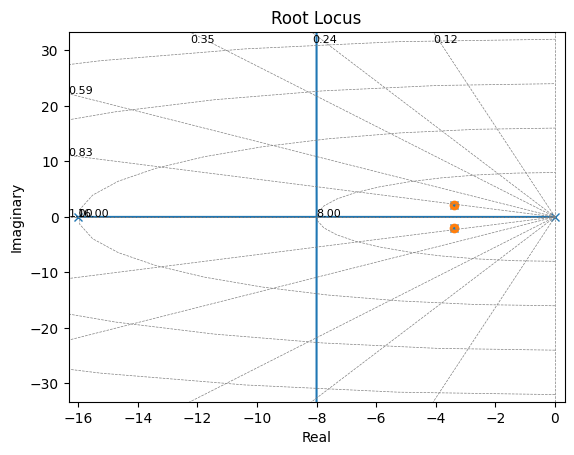

In [38]:
ct.rlocus(Cs_teste*Gs);

In [21]:
MF = ct.feedback(Cs_teste*Gs, 1, -1)
MF

TransferFunction(array([ 20.71284689, 140.17341   , 326.1678    ]), array([1.13134581e-01, 2.57557683e+00, 3.47411024e+01, 1.68677073e+02,
       3.26167800e+02]))

### Sinal de Controle

In [22]:
SCMF = ct.feedback(Cs_teste, Gs, -1)
SCMF

TransferFunction(array([  2.34333925,  31.71256049, 181.09238484, 499.37248796,
       581.06106587]), array([1.13134581e-01, 2.57557683e+00, 3.47411024e+01, 1.68677073e+02,
       3.26167800e+02]))

In [23]:
ct.damp(MF);

    Eigenvalue (pole)       Damping     Frequency
    -7.999    +10.91j        0.5912         13.53
    -7.999    -10.91j        0.5912         13.53
    -3.384    +2.073j        0.8528         3.969
    -3.384    -2.073j        0.8528         3.969


In [24]:
ct.step_info(MF)

{'RiseTime': 0.1372186632909499,
 'SettlingTime': 0.4459606556955872,
 'SettlingMin': 0.9606181877365574,
 'SettlingMax': 1.099902217303539,
 'Overshoot': 9.990221730353909,
 'Undershoot': 0,
 'Peak': 1.099902217303539,
 'PeakTime': 0.29158965949326854,
 'SteadyStateValue': 1.0}

(array([-7.99851707+10.91213169j, -7.99851707-10.91213169j,
        -3.38428387 +2.07277102j, -3.38428387 -2.07277102j]),
 array([-3.38373114+2.07303862j, -3.38373114-2.07303862j]))

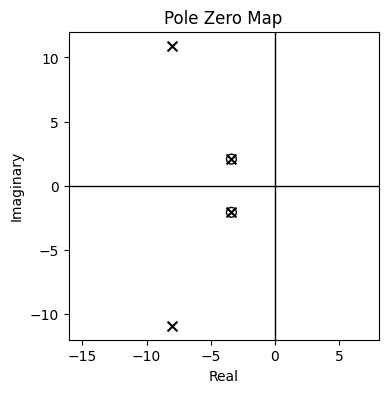

In [25]:
plt.figure(figsize=(4, 4))
ct.pzmap(MF)

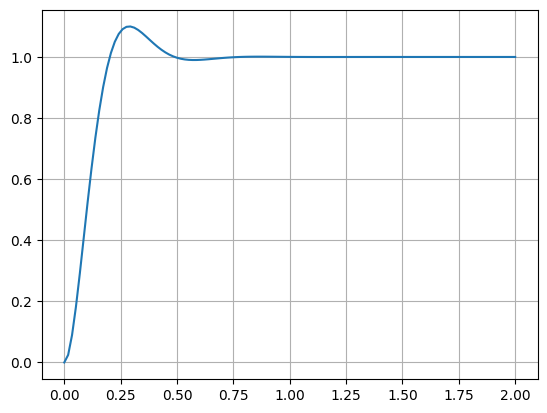

In [26]:
t, y = ct.step_response(MF, 2)

plt.plot(t, y)
plt.grid()
plt.show()

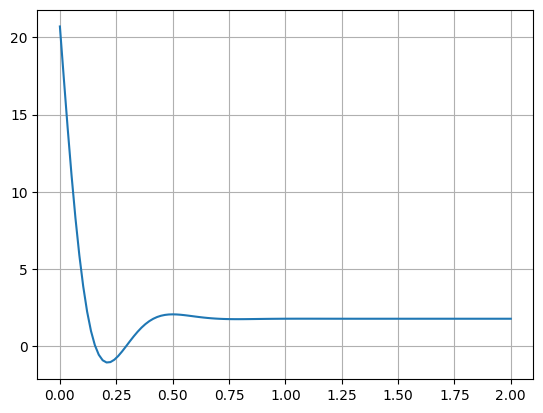

In [27]:
t, y = ct.step_response(SCMF, 2)

plt.plot(t, y)
plt.grid()
plt.show()

## Discretização do Controlador

In [39]:
Cs_teste

TransferFunction(array([ 20.71284689, 140.17341   , 326.1678    ]), array([ 1, 16,  0]))

In [40]:
Ts = 0.02

Cz = ct.c2d(Cs_teste, Ts, 'tustin')
print('Função de Transferência: \n')
display(Cz)

Gz = ct.c2d(Gs, Ts, 'tustin')
print('Função de Transferência: \n')
display(Gz)

Função de Transferência: 



TransferFunction(array([ 19.09241187, -35.65556915,  16.67562894]), array([ 1.        , -1.72413793,  0.72413793]), 0.02)

Função de Transferência: 



TransferFunction(array([0.00082667, 0.00165334, 0.00082667]), array([ 1.        , -1.86755837,  0.87344916]), 0.02)

In [30]:
MF_dis = ct.feedback(Cz*Gz, 1, -1)
MF_dis

TransferFunction(array([ 0.01578316,  0.00209086, -0.02938248, -0.00190491,  0.01378528]), array([ 1.01578316, -3.58960543,  4.78813283, -2.86022159,  0.64628294]), 0.02)

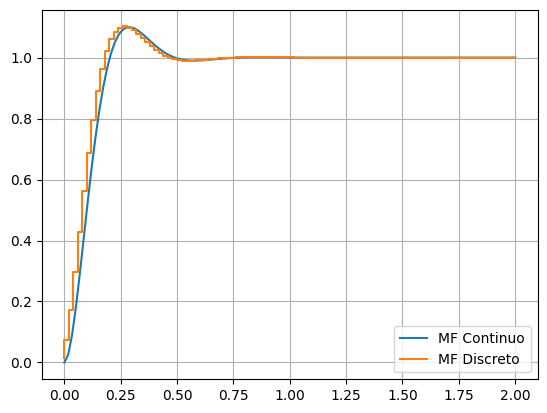

In [31]:
tc, yc = ct.step_response(MF, 2)

t, y = ct.step_response(MF_dis, 2)

plt.plot(tc, yc, label="MF Continuo")
plt.step(t, y, label="MF Discreto")
plt.legend()
plt.grid()
plt.show()

$$\frac{U(z)}{E(z)} = \frac{b_0 z + b_1}{z - 1} \frac{z^{-1}}{z^{-1}} $$

$$\frac{U(z)}{E(z)} = \frac{19.09 z^2 - 35.66 z + 16.68}{z^2 - 1.724 z + 0.7241} \frac{z^{-2}}{z^{-2}} $$

$$\frac{U(z)}{E(z)} = \frac{19.09 - 35.66 z^{-1} + 16.68z^{-2}}{1 - 1.724 z^{-1} + 0.7241z^{-2}}$$


$$
U(z)[1 - 1.724 z^{-1} + 0.7241z^{-2}] = E(z)[19.09 - 35.66 z^{-1} + 16.68z^{-2}]
$$

$$
U(z) -U(z)1.724z^{-1} + U(z)0.7241z^{-2} = E(z)19.09 - E(z)35.66 z^{-1} + E(z)16.68z^{-2}
$$

Transformada z inversa:

$$
u[k] -1.724u[k-1] + 0.7241u[k-2] = 19.09e[k] - 35.66e[k-1] + 16.68e[k-2]
$$



Equação de Diferenças:

$$
u[k] =  1.724u[k-1] - 0.7241u[k-2] + 19.09e[k] - 35.66e[k-1] + 16.68e[k-2]
$$